# **Introduction to Pandas and Practices**
1. ตารางข้อมูล (DataFrame)
2. ฟังก์ชันที่ใช้ในการคำนวณค่า BMI และ ภาวะของ BMI
3. การสรุปภาพรวมของข้อมูล (Data Summarization)
4. การคัดกรอง (Filtering) และจัดเรียงข้อมูล (Sorting)
5. การจัดกลุ่มข้อมูล (GroupBy Operations)ุ
6. การทำความสะอาดข้อมูล (Data Cleaning)
7. การเปลี่ยนแปลงข้อมูล (Data Transformation)
8. การจัดการกับข้อมูลที่มีค่าแตกต่างกัน (Normalization and Scaling Data)
9. การนำเข้า (Import) และส่งออก (Export) ข้อมูล

### **1. ตารางข้อมูล (DataFrame)**

In [ ]:
import pandas as pd

#-------------------------------------------------------------
# ฟังก์ชันในการสร้าง ตารางข้อมูล (DataFrame)
# ข้อมูลน้ำหนัก (weight) และส่วนสูง (height)
#-------------------------------------------------------------
def get_data():
  data = {'weight': [   70,   77,   77,   77,   80,   70, None],    # ข้อมูลน้ำหนัก (weight)
          'height': [ 2100,  185,  190,  170,  155,  None,  170]}   # ข้อมูลส่วนสูง (height)

  df = pd.DataFrame(data)   # สร้าง DataFrame จากข้อมูล (data) น้ำหนัก (weight) และส่วนสูง (height)
  return df

df = ?()                  # เก็บ ตารางข้อมูล (DataFrame) ไว้ในตัวแปร df
?                         # แสดงข้อมูลใน DataFrame

,weight,height
0,70.0,2100.0
1,77.0,185.0
2,77.0,190.0
3,77.0,170.0
4,80.0,155.0
5,70.0,NaN
6,NaN,170.0


### **2. ฟังก์ชันที่ใช้ในการคำนวณค่า BMI และ ภาวะของ BMI**

In [ ]:
#-------------------------------------------------------------
# ฟังก์ชัน คำนวณค่า BMI
#-------------------------------------------------------------
def bmi_calculator(weight, height):  # น้ำหนัก (kg), ส่วนสูง (cm)

  bmi = weight / ((height/100)**2)    # คำนวณค่า BMI
  bmi = round(bmi, 1)                 # ทศนิยม 1 ตำแหน่ง

  ?                                   # ส่งคืน BMI ที่คำนวณได้

In [ ]:
#-------------------------------------------------------------
# ฟังก์ชัน คำนวณค่า ภาวะของ BMI
#-------------------------------------------------------------
def bmi_status(bmi):

  if bmi < 18.5:                        # bmi น้อยกว่า 18.5        : ต่ำกว่าเกณฑ์
    status = 'ต่ำกว่าเกณฑ์'
  elif bmi >= 18.5 and bmi <= 22.9:     # bmi ระหว่าง 18.5 - 22.9  : สมส่วน
    status = 'สมส่วน'
  elif bmi >= 23 and bmi <= 24.9:       # bmi ระหว่าง 23.0 - 24.9  : เกินมาตรฐาน
    status = 'เกินมาตรฐาน'
  elif bmi >= 25 and bmi <= 29.9:       # bmi ระหว่าง 25.0 - 29.9  : โรคอ้วน
    status = 'โรคอ้วน'
  else:                                 # bmi มากกว่า 30.0         : รคอ้วนอันตราย
    status = 'โรคอ้วนอันตราย'

  return status

### **3. การสรุปภาพรวมของข้อมูล (Data Summarization)**

In [ ]:
?         # แสดงรายละเอียดของ DataFrame .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  6 non-null      float64
 1   height  6 non-null      float64
dtypes: float64(2)
memory usage: 240.0 bytes


In [ ]:
?    # แสดงค่าสถิติเชิงพรรณา ของ DataFrame .describe()

,weight,height
count,6.000000,6.00000
mean,75.166667,495.00000
std,4.167333,786.38413
min,70.000000,155.00000
25%,71.750000,170.00000
50%,77.000000,177.50000
75%,77.000000,188.75000
max,80.000000,2100.00000


In [ ]:
df[?].value_counts()   # นับจำนวน แยกตามน้ำหนัก (weight)

,count
weight,
77.0,3
70.0,2
80.0,1


In [ ]:
df['weight'].?          # น้ำหนักเฉลี่ย

75.16666666666667

### **4. การคัดกรอง (Filtering) และจัดเรียงข้อมูล (Sorting)**

In [ ]:
filtered  = df['weight']  < 80   # คัดกรองเฉพาะคนที่มีน้ำหนักน้อยกว่า 80

filtered

,weight
0,True
1,True
2,True
3,True
4,False
5,True
6,False


In [ ]:
filtered  = df['weight'] < ?   # คัดกรองเฉพาะคนที่มีน้ำหนักน้อยกว่า 80

df[?]                           # นำผลที่ได้มาคัดกรองข้อมูลจาก DataFrame (filtered)

,weight,height
0,70.0,2100.0
1,77.0,185.0
2,77.0,190.0
3,77.0,170.0
5,70.0,NaN


In [ ]:
df_filtered = df.query('?') # คัดกรองคนที่มีความสูง (height) มากกว่า 200 หรือ (or) มีน้ำหนัก (weight) ต่ำกว่า 77

df_filtered

,weight,height
0,70.0,2100.0
5,70.0,NaN


### **5. การจัดกลุ่มข้อมูล (GroupBy Operations)**

In [ ]:
df.?('weight').mean()       # หาค่าเฉลี่ย ตามกลุ่มของน้ำหนัก (weight) .groupby(...)

,height
weight,
70.0,2100.000000
77.0,181.666667
80.0,155.000000


In [ ]:
df.groupby('weight').?      # นับจำนวน แยกตามน้ำหนัก (weight) .count()

,height
weight,
70.0,1
77.0,3
80.0,1


### **6. การทำความสะอาดข้อมูล (Data Cleaning)**

#### **6.1 วิธีการที่ 1:** ถ้าเจอค่าว่าง (NaN) ให้ลบแถวนั้นทิ้ง แล้วค่อยแทนค่าว่าง (NaN) ด้วยค่าเฉลี่ย หรือค่ากลางอื่น ๆ

In [ ]:
df = ?             # เก็บ ตารางข้อมูล (DataFrame) ไว้ในตัวแปร df -> get_data()

df.dropna(?)     # แสดงผลลัพธ์ ถ้าเราลบแถวที่มีค่าว่าง (NaN) ออก โดยแทนค่าเข้าไปที่เดิม (inplace=True)

clean_df = df.copy()

clean_df['weight'] = df['weight'].fillna(df['weight'].mean())     # แทนค่าน้ำหนัก (weight) ที่มีค่า NaN ด้วยค่าเฉลี่ยของน้ำหนัก (weight)
clean_df['height'] = df['height'].fillna(df['height'].mean())     # แทนค่าส่วนสูง (height) ที่มีค่า NaN ด้วยค่าเฉลี่ยของส่วนสูง (height)

clean_df        # พบว่ามี Outlier ของความสูง (height) ที่ 2100 ซึ่งจะส่งผลต่อการพยากรณ์

,weight,height
0,70.0,2100.0
1,77.0,185.0
2,77.0,190.0
3,77.0,170.0
4,80.0,155.0


#### **6.2 วิธีการที่ 2:** กำจัดข้อมูลผิดปกติ (Outlier) ก่อน แล้วค่อยแทนค่าว่าง (NaN) ด้วยค่าเฉลี่ย หรือค่ากลางอื่น ๆ

In [ ]:
df = get_data()                     # เก็บ ตารางข้อมูล (DataFrame) ไว้ในตัวแปร df

Q1 = df['height'].quantile(?)    # การหาควอไทล์ที่ 25 (.25)
Q3 = df['height'].quantile(?)    # การหาควอไทล์ที่ 75 (.75)

IQR = Q3 - Q1                       # ควอไทล์ที่อยู่ระหว่าง 25 - 75

upper_bound = Q3 + 1.5 * IQR        # ขอบเขตบน
lower_bound = Q1 - 1.5 * IQR        # ขอบเขตล่าง

outliers = df[(df['height'] < lower_bound) | (df['height'] > upper_bound)]  # การหาข้อมูลผิดปกติ (Outlier) ที่อยู่นอกช่วง ขอบเขตบน - ล่าง
lower_bound, upper_bound            # (141.875, 216.875)

outliers                            # แสดงข้อมูลผิดปกติ (Outlier)

clean_df = df[~df.index.isin(outliers.index)].copy()  # กรองข้อมูลผิดปกติออกด้วย tilde (~) operator
clean_df.dropna()                                     # กำจัดค่าว่าง (NaN) โดยแทนค่าเข้าไปที่เดิม (inplace=True)

clean_df                            # DataFrame ที่ผ่านการทำความสะอาดข้อมูลแล้ว

,weight,height
1,77.0,185.0
2,77.0,190.0
3,77.0,170.0
4,80.0,155.0


#### **6.3 วิธีการที่ไม่ควรทำ** คือ แทนค่าว่าง (NaN) ด้วยค่าเฉลี่ย หรือค่ากลางอื่น ๆ โดยไม่ได้กำจัด Outlier ก่อน

In [ ]:
# ให้ระมัดระวังค่าความสูง (height: 2100) ที่เป็น Outlier อันจะส่งผลความเอนเอียงต่อ การแทนข้อมูลที่ศูนย์หายด้วยค่าเฉลี่ย
# clean_df = df.copy()                                              # ทำสำเนาของ DataFrame

# clean_df['weight'] = df['weight'].fillna(df['weight'].mean())     # แทนค่าน้ำหนัก (weight) ที่มีค่า NaN ด้วยค่าเฉลี่ยของน้ำหนัก (weight)
# clean_df['height'] = df['height'].fillna(df['height'].mean())     # แทนค่าส่วนสูง (height) ที่มีค่า NaN ด้วยค่าเฉลี่ยของส่วนสูง (height)

# clean_df

,weight,height,BMI
0,70.0,2100.0,0.2
1,77.0,185.0,22.5
2,77.0,190.0,21.3
3,77.0,170.0,26.6
4,80.0,155.0,33.3


### **7. การเปลี่ยนแปลงข้อมูล (Data Transformation)**

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# คำนวณค่า BMI โดยส่ง น้ำหนัก (weight) และ ความสูง (height) ของ DataFrame ที่ยังไม่ได้ทำความสะอาด ไปที่ฟังก์ชัน bmi_calculator
#-----------------------------------------------------------------------------------------------------------------
clean_df['BMI'] = clean_df.apply(lambda row: bmi_calculator(row['weight'], row['height']), axis=1)  # axis=1 ให้ apply ในแต่ละแถว (axis=0 แต่ละคอลัมน์)

clean_df

,weight,height,BMI
1,77.0,185.0,22.5
2,77.0,190.0,21.3
3,77.0,170.0,26.6
4,80.0,155.0,33.3


In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# คำนวณค่า BMI โดยส่ง น้ำหนัก (weight) และ ความสูง (height) ของ DataFrame ที่ทำความสะอาดแล้ว ไปที่ฟังก์ชัน bmi_calculator
#-----------------------------------------------------------------------------------------------------------------
clean_df['BMI'] = clean_df.apply(lambda row: bmi_calculator(row['weight'], row['height']), axis=1)  # axis=1 ให้ apply ในแต่ละแถว (axis=0 แต่ละคอลัมน์)

clean_df

,weight,height,BMI
1,77.0,185.0,22.5
2,77.0,190.0,21.3
3,77.0,170.0,26.6
4,80.0,155.0,33.3


In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# คำนวณค่าภาวะของ BMI  โดยส่ง BMI ของ DataFrame ที่ทำความสะอาดแล้ว ไปที่ฟังก์ชัน คำนวณค่า
#-----------------------------------------------------------------------------------------------------------------
clean_df['status'] = clean_df['BMI'].apply(bmi_status)

clean_df

,weight,height,BMI,status
1,77.0,185.0,22.5,สมส่วน
2,77.0,190.0,21.3,สมส่วน
3,77.0,170.0,26.6,โรคอ้วน
4,80.0,155.0,33.3,โรคอ้วนอันตราย


### **8. การจัดการกับข้อมูลที่มีค่าแตกต่างกัน (Normalization and Scaling Data)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # แปลงตัวเลขให้อยู่ระหว่าง 0-1

weight_scaler = ? # จะทำการแปลงน้ำหนัก (weight)  ให้ตัวเลขอยู่ระหว่าง 0-1 -> MinMaxScaler()
height_scaler = ? # จะทำการแปลงส่วนสูง (height) ให้ตัวเลขอยู่ระหว่าง 0-1  -> MinMaxScaler()

clean_df['weight_scaled'] = weight_scaler.fit_transform(clean_df[['weight']])     # สร้างคอลัมน์ใหม่ของน้ำหนัก (weight) เพื่อเก็บผลการแปลง
clean_df['height_scaled'] = height_scaler.fit_transform(clean_df[['height']])     # สร้างคอลัมน์ใหม่ของส่วนสูง (height) เพื่อเก็บผลการแปลง

clean_df

,weight,height,BMI,status,weight_scaled,height_scaled
1,77.0,185.0,22.5,สมส่วน,0.0,0.857143
2,77.0,190.0,21.3,สมส่วน,0.0,1.000000
3,77.0,170.0,26.6,โรคอ้วน,0.0,0.428571
4,80.0,155.0,33.3,โรคอ้วนอันตราย,1.0,0.000000


### **9. การนำเข้า (Import) และส่งออก (Export) ข้อมูล**

In [ ]:
# การส่งออก (Export) เพื่อจัดเก็บข้อมูล DataFrame ไว้ในแฟ้มข้อมูล
clean_df.?('clean_bmi.csv')                # บันทึกข้อมูล BMI ลงแฟ้มชื่อ 'clean_bmi.csv' -> to_csv(...)
#clean_df.to_csv('clean_bmi.csv', index=False)  # แก้ปัญหา มีคอลัมน์ "Unnamed: 0" บันทึกข้อมูล BMI ลงแฟ้มชื่อ 'clean_bmi.csv'

clean_df

,weight,height,BMI,status,weight_scaled,height_scaled
1,77.0,185.0,22.5,สมส่วน,0.0,0.857143
2,77.0,190.0,21.3,สมส่วน,0.0,1.000000
3,77.0,170.0,26.6,โรคอ้วน,0.0,0.428571
4,80.0,155.0,33.3,โรคอ้วนอันตราย,1.0,0.000000


In [ ]:
read_clean_df = pd.read_csv('clean_bmi.csv')      # อ่านข้อมูลจากแฟ้มชื่อ 'clean_bmi.csv'

read_clean_df

,Unnamed: 0,weight,height,BMI,status,weight_scaled,height_scaled
0,1,77.0,185.0,22.5,สมส่วน,0.0,0.857143
1,2,77.0,190.0,21.3,สมส่วน,0.0,1.000000
2,3,77.0,170.0,26.6,โรคอ้วน,0.0,0.428571
3,4,80.0,155.0,33.3,โรคอ้วนอันตราย,1.0,0.000000


In [ ]:
#clean_df.corr() # แสดงความสัมพันธ์ระหว่างคอลัมน์ (Features)

ok = clean_df.select_dtypes(include='number').corr() # แสดงความสัมพันธ์ระหว่างคอลัมน์ (Features) โดยเลือกเฉพาะคอลัมน์ที่เป็นตัวเลข

ok

,weight,height,BMI,weight_scaled,height_scaled
weight,1.000000,-0.843274,0.907967,1.000000,-0.843274
height,-0.843274,1.000000,-0.990823,-0.843274,1.000000
BMI,0.907967,-0.990823,1.000000,0.907967,-0.990823
weight_scaled,1.000000,-0.843274,0.907967,1.000000,-0.843274
height_scaled,-0.843274,1.000000,-0.990823,-0.843274,1.000000


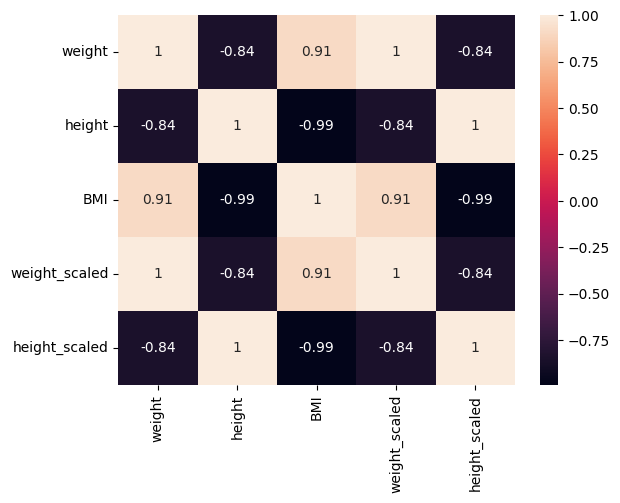

In [ ]:
import seaborn as sns             # ใช้สำหรับสร้างแผนภูมิ
import matplotlib.pyplot as plt   # ใช้สำหรับแสดงแผนภูมิ

sns.?(ok, annot=True)             # แสดงแผนภูมิ Heatmap ความสัมพันธ์ (Correlation) ของคอลัมน์ (Features) ที่เป็นตัวเลข -> heatmap(...)
plt.show()

## ฟังก์ชันที่ใช้ในการอ่านข้อมูลบ้าน
* สร้าง DataFrame ของบ้านที่มีข้อมูลครบถ้วน (Complete)
* สร้าง DataFrame ของบ้านที่มีข้อมูลไม่ครบถ้วน (InComplete)


In [ ]:
import pandas as pd
# -------------------------------------------------------
# ฟังก์ชันในการสร้าง DataFrame ของบ้านที่มีข้อมูลครบถ้วน (Complete)
# -------------------------------------------------------
def get_house_complete():

  # ข้อมูลบ้าน (name) พื้นที่ใช้สอย (size) จำนวนห้อง (room) และราคาบ้าน (price)
  data = {'name':  ['House.1', 'House.2', 'House.3', 'House.4', 'House.5', 'House.6', 'House.7'],
          'size':  [       50,        75,       105,       130,       145,       170,       200],
          'room':  [        2,         2,         3,         4,         4,         5,         6],
          'price': [  500_000, 1_000_000,   650_000, 1_200_000, 1_300_000, 1_850_000, 2_000_000]}

  df = pd.DataFrame(data) # สร้าง DataFrame
  return df

# -----------------------------------------------------------
# ฟังก์ชันในการสร้าง DataFrame ของบ้านที่มีข้อมูลไม่ครบถ้วน (InComplete)
# -----------------------------------------------------------
def get_house_incomplete():

  # ข้อมูลบ้าน (name) พื้นที่ใช้สอย (size) จำนวนห้อง (room) และราคาบ้าน (price)
  data = {'name':  ['House.1', 'House.2', 'House.3', 'House.4', 'House.5',      None, 'House.7'],
          'size':  [       50,      None,       105,       130,       145,       170,       200],
          'room':  [        2,      None,         3,         4,      None,         5,         6],
          'price': [  500_000, 1_000_000,   650_000, 1_200_000,      None, 1_850_000, 2_000_000]}

  df = pd.DataFrame(data) # สร้าง DataFrame
  return df

In [ ]:
df = get_house_complete()

df

,name,size,room,price
0,House.1,50,2,500000
1,House.2,75,2,1000000
2,House.3,105,3,650000
3,House.4,130,4,1200000
4,House.5,145,4,1300000
5,House.6,170,5,1850000
6,House.7,200,6,2000000


In [ ]:
df_not_cleaned = get_house_incomplete()

df_not_cleaned

,name,size,room,price
0,House.1,50.0,2.0,500000.0
1,House.2,NaN,NaN,1000000.0
2,House.3,105.0,3.0,650000.0
3,House.4,130.0,4.0,1200000.0
4,House.5,145.0,NaN,NaN
5,None,170.0,5.0,1850000.0
6,House.7,200.0,6.0,2000000.0
